The goal of this file is to get a baseline for performace (ML) to know if it is worth optimizing or not

**It takes as input:**
- X_train,y_train,X_test,y_test

**It returns:**
- ML baseline performance

## Script

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def exc(X_train, X_test, y_train, y_test):
  params = {
      'objective': 'multi:softmax',
      'num_class': len(np.unique(y_train)),
      'max_depth': 100,
      'eta': 0.9,
      'min_child_weight': 20,
      'scale_pos_weight': 6,
      'multi_strategy': 'multi_output_tree',
      'gamma': 0.1,
      'subsample': 0.8,
      'colsample_bytree': 0.8,
      'eval_metric': 'merror',
      'tree_method' : "hist", 'device' : "cuda"
  }

  dtrain = xgb.DMatrix(X_train, label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)

  num_rounds = 10
  evals = [(dtrain, 'train'), (dtest, 'eval')]
  model = xgb.train(params, dtrain, num_rounds, evals, verbose_eval=True)

  y_pred = model.predict(dtest)

  report = classification_report(y_test, y_pred)
  print("Classification Report:\n", report)

  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

  return model, y_pred

## DEV

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Trading Bot/Data/Crypto/SOL/SOLUSDT-5m-2022-2023-labeled")
df.index = pd.to_datetime(df["Date"])
df.drop(columns = ["Date"],inplace = True)
df.sort_index(inplace = True)

In [ ]:
X = df.drop(['Reversal'], axis=1)
y = df["Reversal"]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:11:02] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:11:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-merror:0.08409	eval-merror:0.08208
[1]	train-merror:0.08409	eval-merror:0.08208
[2]	train-merror:0.08401	eval-merror:0.08216
[3]	train-merror:0.08385	eval-merror:0.08224
[4]	train-merror:0.08347	eval-merror:0.08229
[5]	train-merror:0.08331	eval-merror:0.08248
[6]	train-merror:0.08288	eval-merror:0.08246
[7]	train-merror:0.08243	eval-merror:0.08294
[8]	train-merror:0.08206	eval-merror:0.08323
[9]	train-merror:0.08149	eval-merror:0.08351
[10]	train-merror:0.08087	eval-merror:0.08378
[11]	train-merror:0.08030	eval-merror:0.08435
[12]	train-merror:0.07963	eval-merror:0.08448
[13]	train-merror:0.07909	eval-merror:0.08526
[14]	train-merror:0.07816	eval-merror:0.08524
[15]	train-merror:0.07742	eval-merror:0.08557
[16]	train-merror:0.07674	eval-merror:0.08614
[17]	train-merror:0.07590	eval-merror:0.08597
[18]	train-merror:0.07529	eval-merror:0.08627
[19]	train-merror:0.07443	eval-merror:0.08676
[20]	train-merror:0.07371	eval-merror:0.08726
[21]	train-merror:0.07271	eval-merror:0.0878

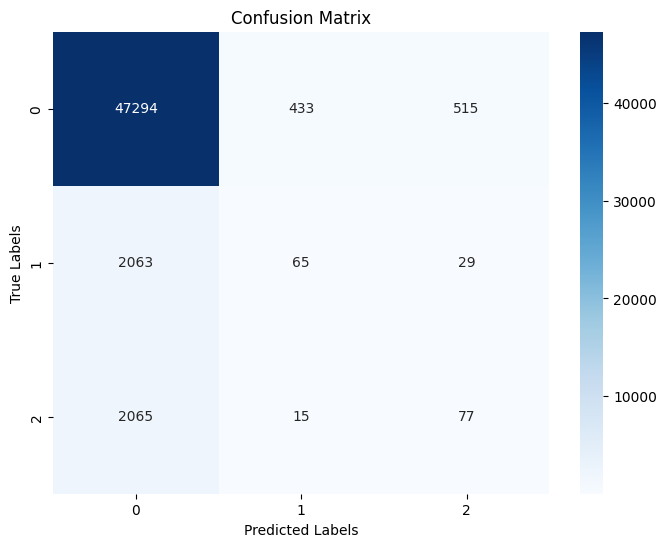

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = False)

params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y)),
    'max_depth': 100,
    'eta': 0.9,
     'min_child_weight': 20,
    'scale_pos_weight': 6,
    #  'multi_strategy': 'multi_output_tree',
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'merror',
    'tree_method' : "hist", 'device' : "cuda"
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Training the model
num_rounds = 100
evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_rounds, evals, verbose_eval=True)

# Making predictions
y_pred = model.predict(dtest)

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()